In [37]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import torch
import os
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
import re
import json
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Metadata for runs

In [70]:
runs = pickle.load(open('results/grid/basic/metadata3.pickle', 'rb'))

In [71]:
runs

{'grid/basic/BERT_model_basic_CLS_c9abb46b-4eb7-4f9f-a15c-50bf159567d2.pt': {'train_error_all': [0.4645846341393682,
   0.41313225974143863,
   0.387060784728127,
   0.3731812527880078,
   0.3651940554357414,
   0.3569891966554901,
   0.3553404177713586],
  'val_error_all': [array(0.44899854, dtype=float32),
   array(0.40917155, dtype=float32),
   array(0.39275748, dtype=float32),
   array(0.38434672, dtype=float32),
   array(0.37633324, dtype=float32),
   array(0.3761544, dtype=float32),
   array(0.37046382, dtype=float32)],
  'parameters': {'batch_size': 256, 'maxlen': 25, 'lr': 0.001, 'step': 5},
  'train_filename': 'data/basic_full_dataset_v1_train.csv'},
 'grid/basic/BERT_model_basic_CLS_fbbb86df-af97-48f3-aacc-24674d51e3fb.pt': {'train_error_all': [0.4902101790204325,
   0.44436960871488906,
   0.4133538381422817,
   0.400276429131364,
   0.3866007002171855,
   0.3780481577782797,
   0.36991822057911444],
  'val_error_all': [array(0.46517, dtype=float32),
   array(0.43976653, dty

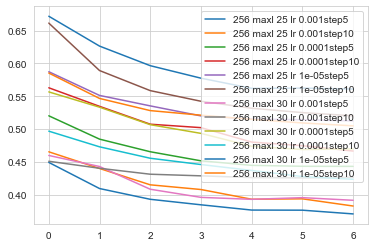

In [73]:
for i in list(runs.keys()):
    params = runs[i]['parameters']
    info = str(params['batch_size'])+" maxl "+ str(params['maxlen']) + ' lr ' + str(params['lr']) +'step'+str(params['step'])
    plt.plot(np.array(runs[i]['val_error_all']), label = info)
plt.legend()

# Load results

In [3]:
eval_res = pickle.load(open('results/evaluation/evaluation_for_puns_test_BERT_model_basic_weighted_CLS_v2.pt', 'rb'))

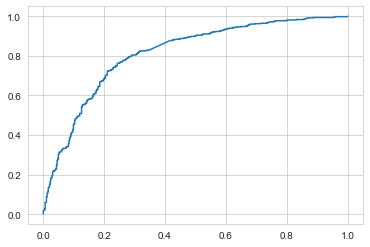

In [5]:
plt.plot(eval_res['metrics']['fpr'], eval_res['metrics']['tpr'])

In [30]:
accuracy_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.7567287784679089

In [31]:
precision_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.75

In [32]:
recall_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.7671517671517671